In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Saving IMAGE_1649849824 (1).webp to IMAGE_1649849824 (1) (1).webp


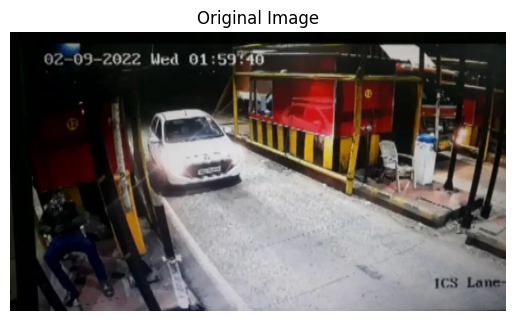

In [16]:
from google.colab import files
uploaded = files.upload()

import io
from PIL import Image

image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

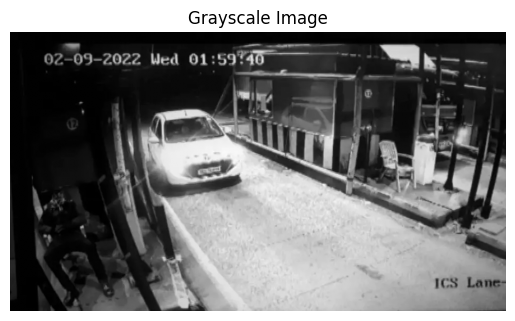

In [17]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

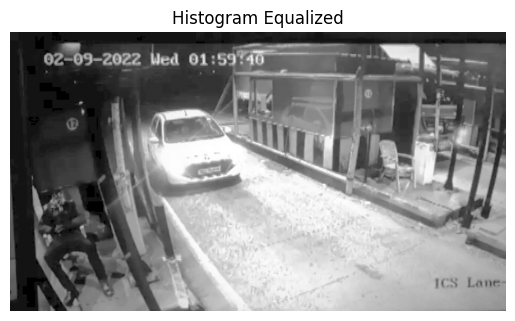

In [18]:
hist_eq = cv2.equalizeHist(gray)
plt.imshow(hist_eq, cmap='gray')
plt.title("Histogram Equalized")
plt.axis("off")
plt.show()

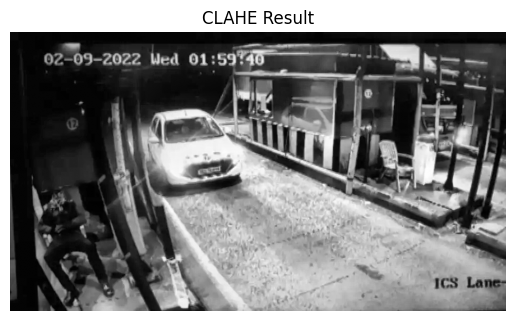

In [7]:
#Contrast Limited Adaptive Histogram Equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_eq = clahe.apply(gray)
plt.imshow(clahe_eq, cmap='gray')
plt.title("CLAHE Result")
plt.axis("off")
plt.show()

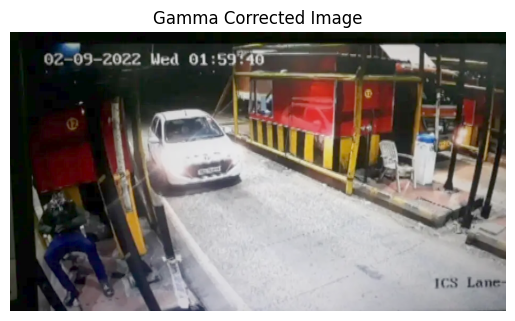

In [8]:
#Gamma Correction
gamma = 1.5
invGamma = 1.0 / gamma
table = np.array([(i / 255.0) ** invGamma * 255 for i in np.arange(0, 256)]).astype("uint8")
gamma_corrected = cv2.LUT(img, table)

plt.imshow(gamma_corrected)
plt.title("Gamma Corrected Image")
plt.axis("off")
plt.show()

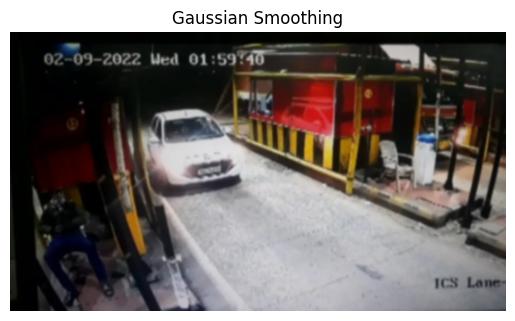

In [9]:
gaussian = cv2.GaussianBlur(img, (7, 7), 0)
plt.imshow(gaussian)
plt.title("Gaussian Smoothing")
plt.axis("off")
plt.show()

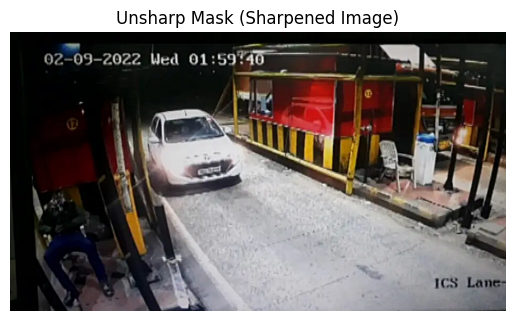

In [10]:
gaussian_blur = cv2.GaussianBlur(img, (9, 9), 10.0)
unsharp_image = cv2.addWeighted(img, 1.5, gaussian_blur, -0.5, 0)

plt.imshow(unsharp_image)
plt.title("Unsharp Mask (Sharpened Image)")
plt.axis("off")
plt.show()

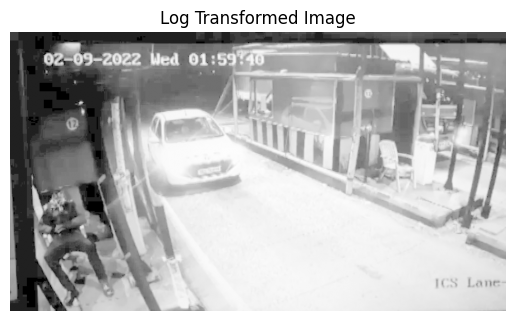

In [13]:
c = 255 / np.log(1 + np.max(gray))
log_transformed = c * (np.log(1 + gray))
log_transformed = np.array(log_transformed, dtype=np.uint8)

plt.imshow(log_transformed, cmap='gray')
plt.title("Log Transformed Image")
plt.axis("off")
plt.show()

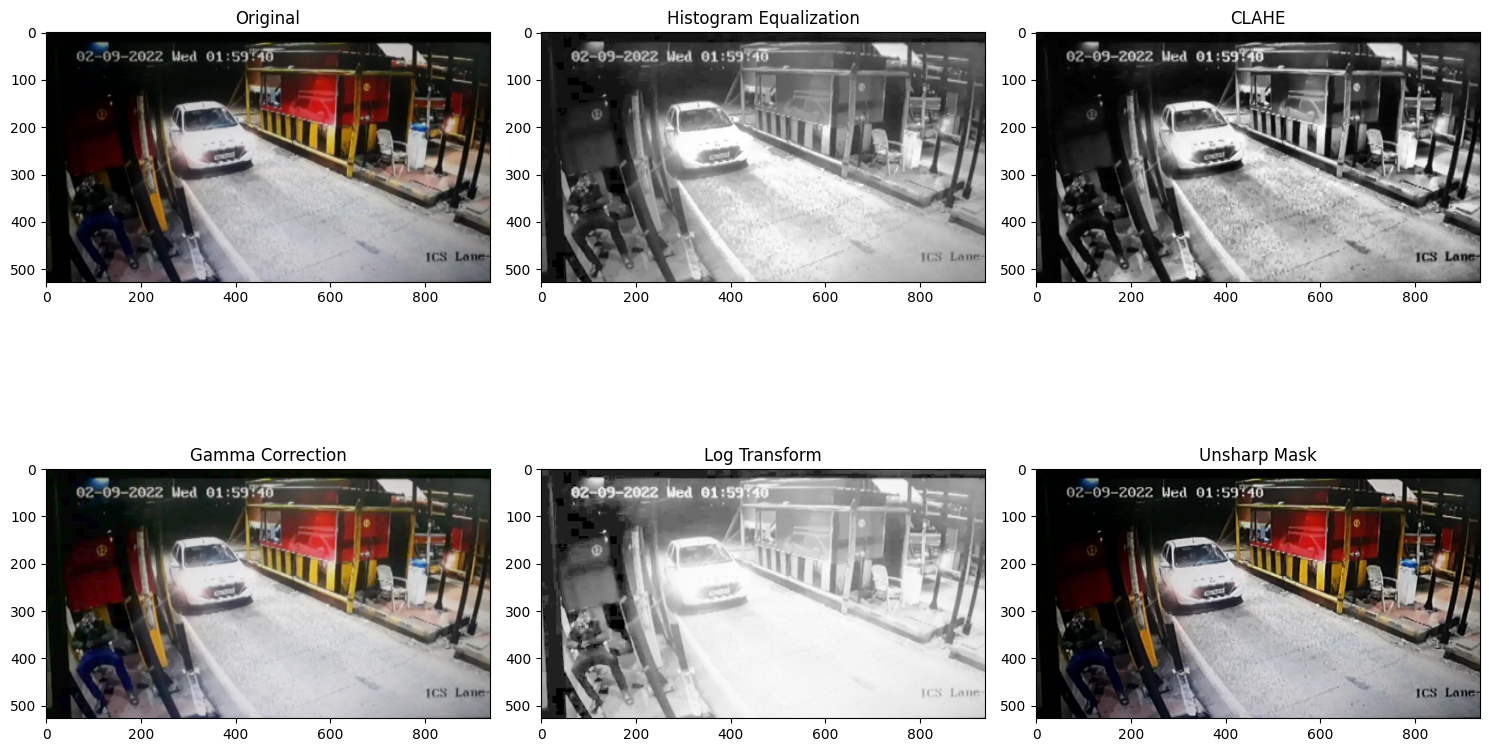

In [14]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.imshow(img)
plt.title("Original")

plt.subplot(2,3,2)
plt.imshow(hist_eq, cmap='gray')
plt.title("Histogram Equalization")

plt.subplot(2,3,3)
plt.imshow(clahe_eq, cmap='gray')
plt.title("CLAHE")

plt.subplot(2,3,4)
plt.imshow(gamma_corrected)
plt.title("Gamma Correction")

plt.subplot(2,3,5)
plt.imshow(log_transformed, cmap='gray')
plt.title("Log Transform")

plt.subplot(2,3,6)
plt.imshow(unsharp_image)
plt.title("Unsharp Mask")

plt.tight_layout()
plt.show()